In [3]:
# import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import re
import fnmatch    # for later text matching
import matplotlib.pyplot as plt    # for plotting
import bokeh
import datetime
from IPython.display import HTML
import seaborn as sns

color = sns.color_palette()
%matplotlib inline 

In [4]:
orig = pd.read_csv("CSV.csv")

In [5]:
dataset = pd.read_csv("/home/pb/Documents/ey-hack/CSV.csv")
HTML(dataset.head(1000).to_html())

,Flt Date,Leg Dep Date,Carrier Code,Flt Num,Leg Orig Apt,Leg Dest Apt,Leg Orig Port,Leg Dest Port,Sch Dep Datetime,Sch Arr Datetime,Act Dep Datetime,Act Arr Datetime,Ac Type Code,Ac Regn Num,Seat Capacity,Ttl Pax Flown
0,01/07/15 00:00,01/07/15 00:00,CX,111,HKG,SYD,HKG,SYD,01/07/15 18:50,02/07/15 06:10,01/07/15 20:26,02/07/15 07:33,33K,B-LAI,251,234.0
1,01/07/15 00:00,01/07/15 00:00,CX,713,BKK,SIN,BKK,SIN,01/07/15 11:50,01/07/15 15:15,01/07/15 11:48,01/07/15 15:19,330,B-LBK,307,243.0
2,01/07/15 00:00,01/07/15 00:00,CX,713,HKG,BKK,HKG,BKK,01/07/15 08:50,01/07/15 10:40,01/07/15 08:54,01/07/15 10:36,330,B-LBK,307,296.0
3,01/07/15 00:00,01/07/15 00:00,CX,714,SIN,HKG,SIN,HKG,01/07/15 01:20,01/07/15 05:10,01/07/15 01:18,01/07/15 05:12,777,B-HNB,335,229.0
4,01/07/15 00:00,01/07/15 00:00,CX,716,SIN,HKG,SIN,HKG,01/07/15 18:10,01/07/15 22:05,01/07/15 18:07,01/07/15 21:59,330,B-LBK,307,307.0
5,01/07/15 00:00,01/07/15 00:00,CX,718,CGK,HKG,JKT,HKG,01/07/15 08:20,01/07/15 14:20,01/07/15 08:20,01/07/15 14:49,330,B-HLU,307,208.0
6,01/07/15 00:00,01/07/15 00:00,CX,719,HKG,CGK,HKG,JKT,01/07/15 16:00,01/07/15 19:50,01/07/15 16:24,01/07/15 20:03,34J,B-HXA,265,250.0
7,01/07/15 00:00,01/07/15 00:00,CX,720,KUL,HKG,KUL,HKG,01/07/15 08:55,01/07/15 13:05,01/07/15 08:51,01/07/15 12:52,34J,B-HXE,265,227.0
8,01/07/15 00:00,01/07/15 00:00,CX,722,KUL,HKG,KUL,HKG,01/07/15 13:25,01/07/15 17:25,01/07/15 13:26,01/07/15 17:46,33G,B-LBC,242,232.0
9,01/07/15 00:00,01/07/15 00:00,CX,723,HKG,KUL,HKG,KUL,01/07/15 08:40,01/07/15 12:25,01/07/15 08:38,01/07/15 12:13,33G,B-LBC,242,233.0


In [6]:
dataset['Flt Date'] = pd.to_datetime(dataset['Flt Date'])
dataset['Leg Dep Date'] = pd.to_datetime(dataset['Leg Dep Date'])
dataset['Sch Dep Datetime'] = pd.to_datetime(dataset['Sch Dep Datetime'])
dataset['Sch Arr Datetime'] = pd.to_datetime(dataset['Sch Arr Datetime'])
dataset['Act Dep Datetime'] = pd.to_datetime(dataset['Act Dep Datetime'])
dataset['Act Arr Datetime'] = pd.to_datetime(dataset['Act Arr Datetime'])
dataset['Ttl Pax Flown'] = dataset['Ttl Pax Flown'].fillna(0.0).apply(lambda x: int(x)) # filling NA with 0


In [7]:
dtype_df = dataset.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,datetime64[ns],6
1,int64,3
2,object,7


In [8]:
missing_df = orig.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,column_name,missing_count
13,Ac Regn Num,1269
10,Act Dep Datetime,1284
11,Act Arr Datetime,1287
15,Ttl Pax Flown,1288


In [ ]:
dataset['Act Dep Datetime']

In [13]:
# check if all rows are unique
s = dataset.duplicated()
print sum(s)

# check if all values in Flt Date and Leg Dept Date are same
if (dataset['Flt Date'] == dataset['Leg Dep Date']).all():
    print True
else:
    print False


0
False


In [48]:
n = datetime.datetime.now().month
print n

8


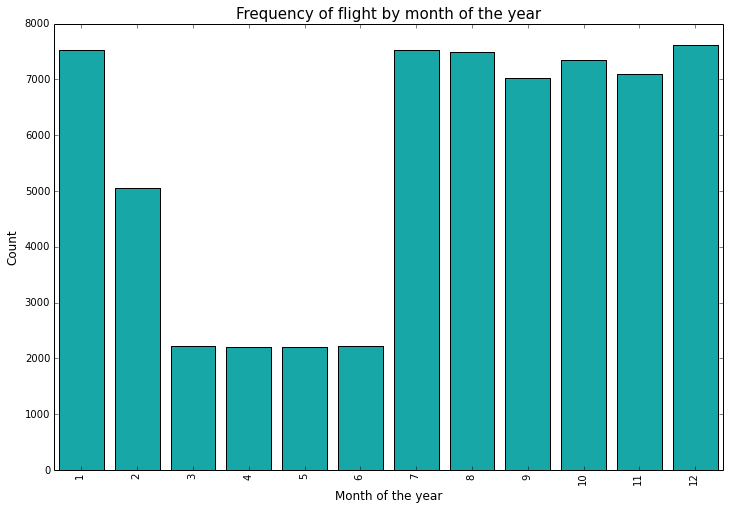

In [49]:
# month of the year
dataset['MOY'] = dataset['Flt Date'].apply(lambda x: x.month)
plt.figure(figsize=(12,8))
sns.countplot(x="MOY", data=dataset, color=color[3])
# plt.ylim([0, 12000])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month of the year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flight by month of the year", fontsize=15)
plt.show()

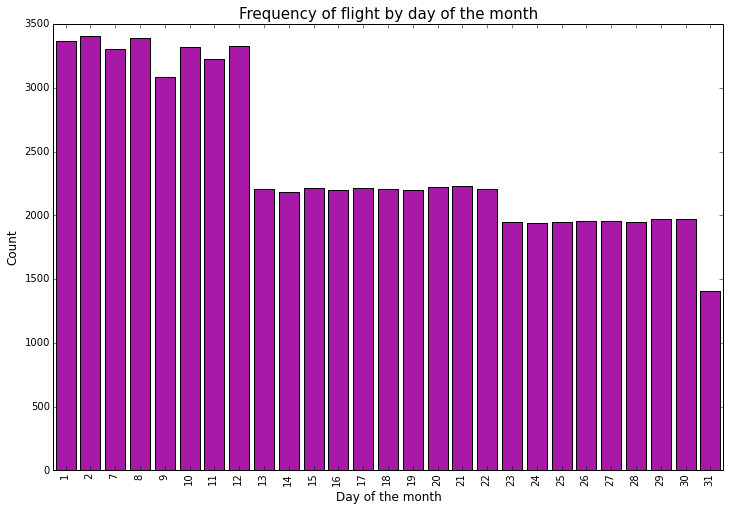

In [54]:
# date/day of the month
dataset['DOM'] = dataset['Sch Dep Datetime'].apply(lambda x: x.day)
plt.figure(figsize=(12,8))
sns.countplot(x="DOM", data=dataset, color=color[4])
# plt.ylim([0, 12000])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of the month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flight by day of the month", fontsize=15)
plt.show()

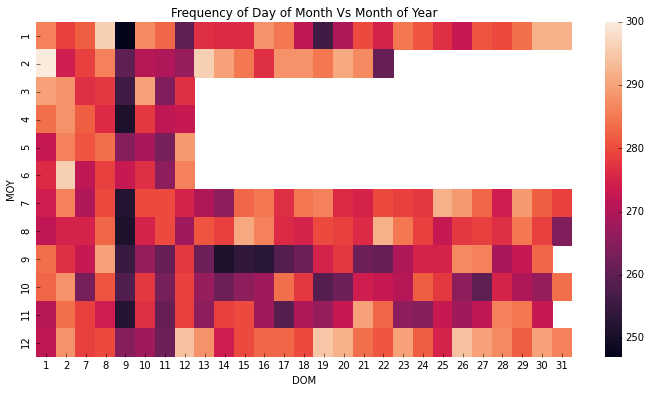

In [52]:
grouped_df = dataset.groupby(["MOY", "DOM"])["Flt Num"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('MOY', 'DOM', 'Flt Num')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of Month Vs Month of Year")
plt.show()

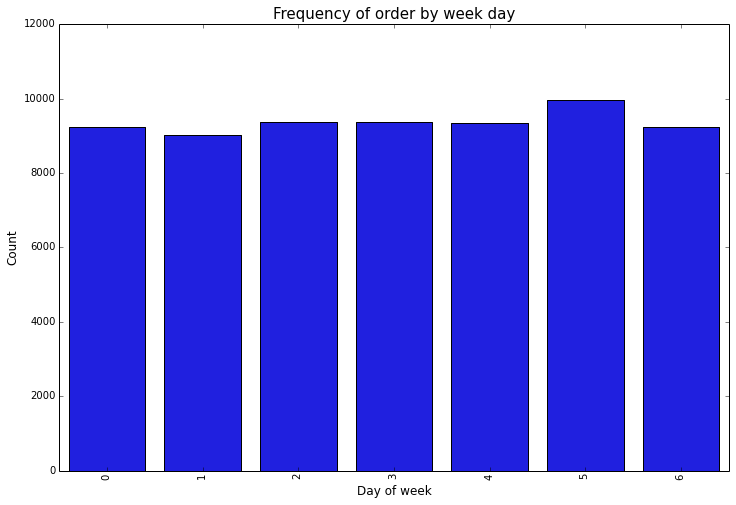

In [33]:
# day of the week
# data = dataset['Flt Date'].apply(lambda x: datetime.datetime(x).weekday())
dataset['DOW'] = dataset['Flt Date'].apply(lambda x: datetime.datetime.weekday(x))

plt.figure(figsize=(12,8))
sns.countplot(x="DOW", data=dataset, color=color[0])
plt.ylim([0, 12000])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

# Zero is monday
# Most flights on Saturday


In [44]:
from dateutil import parser
def roundTime(dt=None, roundTo=60):

    if dt == None : dt = datetime.datetime.now()
    seconds = (dt.replace(tzinfo=None) - dt.min).seconds
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

# n = parser.parse("2017-08-05 20:20:00")
# print roundTime(n, 60*60)


2017-08-05 20:00:00


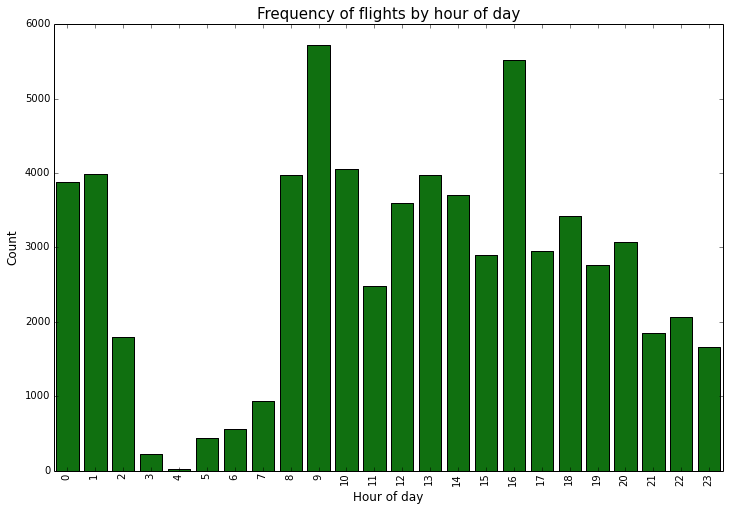

In [32]:
# time of the day
dataset['TOD'] = dataset['Sch Dep Datetime'].apply(lambda x: roundTime(x, roundTo = 60*60)).apply(lambda x: x.hour)
plt.figure(figsize=(12,8))
sns.countplot(x="TOD", data=dataset, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flights by hour of day", fontsize=15)
plt.show()

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


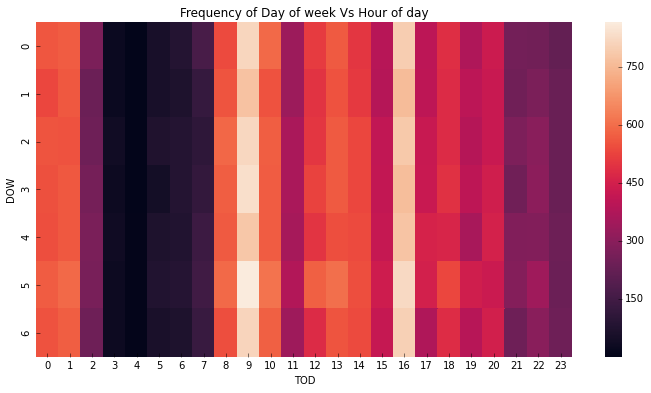

In [34]:
grouped_df = dataset.groupby(["DOW", "TOD"])["Flt Num"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('DOW', 'TOD', 'Flt Num')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()